In [1]:
# Packages and libraries used in this program
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load dataset
x = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])
print("Input data:", x)

Input data: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1]


In [3]:
# initialization
T_MAX = 10
R1 = 1
R2 = 2
C1 = 0.6
C2 = -0.4
X_MAX = 2

# size of the input dataset
N = x.shape[0]

np.set_printoptions(threshold=np.nan)

In [4]:
history = np.zeros((T_MAX, N))

x_old = np.copy(x)
#print("\r\n\r\nt:", 0)
#print("x:", np.around(x, 2))

history[0] = x[:]

for t in range(1, T_MAX):
    #print("\r\n\r\nt:", t)
    
    for i in range(N):
        
        # calculate neighborhood borders
        B1_BEGIN = i - R1
        if (B1_BEGIN < 0):
            B1_BEGIN = 0
        
        B1_END = i + R1
        if (B1_END > N - 1):
            B1_END = N - 1
            
        B2_BEGIN = i - R2
        if (B2_BEGIN < 0):
            B2_BEGIN = 0
        
        B2_END = i + R2
        if (B2_END > N - 1):
            B2_END = N - 1
            
        #print("Neighberhood R1", B1_BEGIN, B1_END)
        #print("Neighberhood R2", B2_BEGIN, B2_END)
        
        #create current weight matrix
        weight = np.zeros(N)
        for j in range(B2_BEGIN, B2_END + 1):
            weight[j] = C2
        for j in range(B1_BEGIN, B1_END + 1):
            weight[j] = C1
            
        #print("Weight matrix for i =", i)
        #print(weight)

        x[i] = np.dot(weight, x_old)
        
        #print(x[i])
        
    # apply activation function
    x = np.minimum(X_MAX, np.maximum(0, x))
    
    #print("x:", np.around(x, 2))
    history[t] = x[:]
    
    x_old = np.copy(x)



t: 0
x: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1]


t: 1
x: [0.06 0.2  0.3  0.4  0.5  0.6  0.7  0.88 0.94 0.88 0.7  0.6  0.5  0.4
 0.3  0.2  0.06]


t: 2
x: [0.04 0.18 0.32 0.4  0.5  0.57 0.73 0.92 1.06 0.92 0.73 0.57 0.5  0.4
 0.32 0.18 0.04]


t: 3
x: [0.   0.16 0.32 0.43 0.46 0.55 0.71 1.03 1.15 1.03 0.71 0.55 0.46 0.43
 0.32 0.16 0.  ]


t: 4
x: [0.   0.11 0.36 0.45 0.46 0.45 0.73 1.1  1.36 1.1  0.73 0.45 0.46 0.45
 0.36 0.11 0.  ]


t: 5
x: [0.   0.11 0.37 0.53 0.37 0.36 0.64 1.3  1.56 1.3  0.64 0.36 0.37 0.53
 0.37 0.11 0.  ]


t: 6
x: [0.   0.07 0.46 0.58 0.36 0.09 0.61 1.43 1.98 1.43 0.61 0.09 0.36 0.58
 0.46 0.07 0.  ]


t: 7
x: [0.   0.09 0.52 0.77 0.19 0.   0.34 1.8  2.   1.8  0.34 0.   0.19 0.77
 0.52 0.09 0.  ]


t: 8
x: [0.   0.06 0.75 0.85 0.23 0.   0.41 1.77 2.   1.77 0.41 0.   0.23 0.85
 0.75 0.06 0.  ]


t: 9
x: [0.   0.14 0.91 1.08 0.19 0.   0.42 1.8  2.   1.8  0.42 0.   0.19 1.08
 0.91 0.14 0.  ]


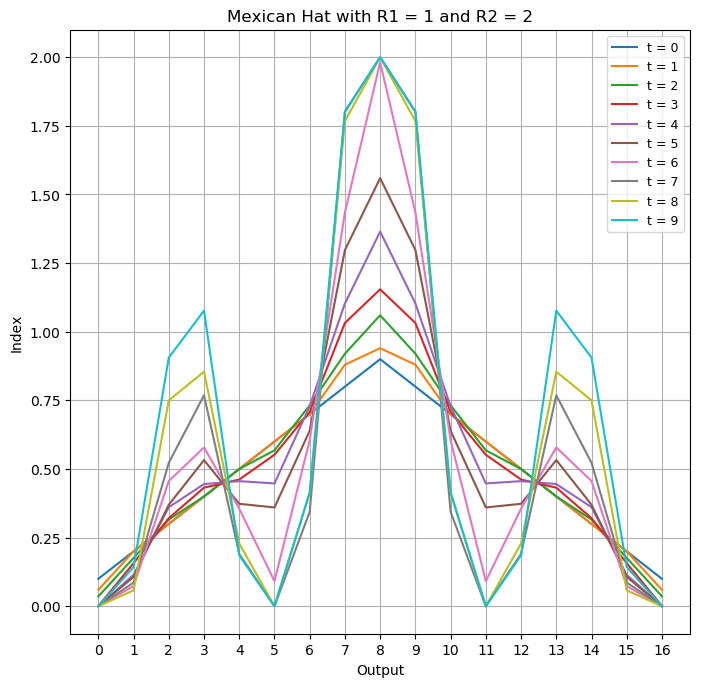

In [5]:
plt.figure(1, figsize=(8, 8), dpi=100)
plt.style.use(['default'])

for t in range(T_MAX):
    print("\r\n\r\nt:", t)
    print("x:", np.around(history[t], 2))
    plt.plot(range(N), history[t], linewidth=1.5, label='t = '+str(t))

plt.xticks(np.arange(N))
#plt.xlim(0, TRAIN_SIZE+VAL_SIZE+TEST_SIZE)
#plt.ylim(0, 1)
plt.xlabel('Output')
plt.ylabel('Index')
plt.title('Mexican Hat with R1 = 1 and R2 = 2')
plt.legend(loc='best', fontsize=9)
plt.grid(True)
plt.show()